In [95]:
import requests 
import pandas as pd 
import numpy as np 

In [96]:
ind_df = pd.read_csv("WID_data_IN.csv", sep=";")
bzl_df = pd.read_csv("WID_data_BR.csv", sep=";")
usa_df = pd.read_csv("WID_data_US.csv", sep=";")
chn_df = pd.read_csv("WID_data_CN.csv", sep=";")
nld_df = pd.read_csv("WID_data_NL.csv", sep=";")
saf_df = pd.read_csv("WID_data_ZA.csv", sep=";")

print(f"Shape of India DataFrame: {ind_df.shape}")
print(f"Shape of Brazil DataFrame: {bzl_df.shape}")
print(f"Shape of USA DataFrame: {usa_df.shape}")
print(f"Shape of China DataFrame: {chn_df.shape}")
print(f"Shape of Netherlands DataFrame: {nld_df.shape}")
print(f"Shape of South Africa DataFrame: {saf_df.shape}")

Shape of India DataFrame: (734991, 7)
Shape of Brazil DataFrame: (543551, 7)
Shape of USA DataFrame: (1215596, 7)
Shape of China DataFrame: (580914, 7)
Shape of Netherlands DataFrame: (757711, 7)
Shape of South Africa DataFrame: (930128, 7)


In [97]:
ind_df['variable'].unique()

array(['ehfcari999', 'ehfghdi999', 'ehfghgi999', ..., 'rdiincj999',
       'tptincj992', 'tptincj999'], shape=(1506,), dtype=object)

In [98]:
ind_df_filtered = ind_df[ind_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
bzl_df_filtered = bzl_df[bzl_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
usa_df_filtered = usa_df[usa_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
chn_df_filtered = chn_df[chn_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
nld_df_filtered = nld_df[nld_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
saf_df_filtered = saf_df[saf_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)

print(f"Filtered Shape of India DataFrame: {ind_df_filtered.shape}")
print(f"Filtered Shape of Brazil DataFrame: {bzl_df_filtered.shape}")
print(f"Filtered Shape of USA DataFrame: {usa_df_filtered.shape}")  
print(f"Filtered Shape of China DataFrame: {chn_df_filtered.shape}")
print(f"Filtered Shape of Netherlands DataFrame: {nld_df_filtered.shape}")
print(f"Filtered Shape of South Africa DataFrame: {saf_df_filtered.shape}")

Filtered Shape of India DataFrame: (32141, 7)
Filtered Shape of Brazil DataFrame: (21686, 7)
Filtered Shape of USA DataFrame: (45289, 7)
Filtered Shape of China DataFrame: (22457, 7)
Filtered Shape of Netherlands DataFrame: (21672, 7)
Filtered Shape of South Africa DataFrame: (21692, 7)


In [99]:
df_combined = pd.concat([ind_df_filtered, bzl_df_filtered, usa_df_filtered, chn_df_filtered, nld_df_filtered, saf_df_filtered], ignore_index=True)
print(f"Combined DataFrame Shape: {df_combined.shape}")
print(f"Sample data from combined DataFrame:\n{df_combined.head(5)}")

Combined DataFrame Shape: (164937, 7)
Sample data from combined DataFrame:
  country    variable percentile  year   value  age pop
0      IN  sptincj999     p4p100  1820  0.9911  999   j
1      IN  sptincj999     p4p100  1850  0.9922  999   j
2      IN  sptincj999     p4p100  1880  0.9982  999   j
3      IN  sptincj999     p4p100  1900  0.9982  999   j
4      IN  sptincj999     p4p100  1910  0.9919  999   j


In [100]:
df_combined[['p_start', 'p_end']] = df_combined['percentile'].str.extract(r'p(\d+\.?\d*)p(\d+\.?\d*)').astype("float")
df_combined.head()

,country,variable,percentile,year,value,age,pop,p_start,p_end
0,IN,sptincj999,p4p100,1820,0.9911,999,j,4.0,100.0
1,IN,sptincj999,p4p100,1850,0.9922,999,j,4.0,100.0
2,IN,sptincj999,p4p100,1880,0.9982,999,j,4.0,100.0
3,IN,sptincj999,p4p100,1900,0.9982,999,j,4.0,100.0
4,IN,sptincj999,p4p100,1910,0.9919,999,j,4.0,100.0


In [101]:
# Filtering top 10%, top 1%, top 0.1%, and bottom 50%
top_10 = df_combined[(df_combined['p_start'] == 90) & (df_combined['p_end'] == 100)].reset_index(drop=True)
top_1 = df_combined[(df_combined['p_start'] == 99) & (df_combined['p_end'] == 100)].reset_index(drop=True)
top_0_1 = df_combined[(df_combined['p_start'] == 99.9) & (df_combined['p_end'] == 100)].reset_index(drop=True)
bottom_50 = df_combined[(df_combined['p_start'] == 0) & (df_combined['p_end'] == 50)].reset_index(drop=True)

df_income_summary = pd.concat([top_10, top_1, top_0_1, bottom_50], ignore_index=True)
df_income_summary['income_distribution'] = np.where(df_income_summary['p_start'] == 90, 'top_10%',
                                        np.where(df_income_summary['p_start'] == 99, 'top_1%',
                                        np.where(df_income_summary['p_start'] == 99.9, 'top_0.1%',
                                        np.where(df_income_summary['p_start'] == 0, 'bottom_50%', 'other'))))
df_income_summary

,country,variable,percentile,year,value,age,pop,p_start,p_end,income_distribution
0,IN,sptincj999,p90p100,1820,0.4800,999,j,90.0,100.0,top_10%
1,IN,sptincj999,p90p100,1850,0.5000,999,j,90.0,100.0,top_10%
2,IN,sptincj999,p90p100,1880,0.5460,999,j,90.0,100.0,top_10%
3,IN,sptincj999,p90p100,1900,0.5376,999,j,90.0,100.0,top_10%
4,IN,sptincj999,p90p100,1910,0.4480,999,j,90.0,100.0,top_10%
...,...,...,...,...,...,...,...,...,...,...
1699,ZA,sptincj999,p0p50,2020,0.0627,999,j,0.0,50.0,bottom_50%
1700,ZA,sptincj999,p0p50,2021,0.0627,999,j,0.0,50.0,bottom_50%
1701,ZA,sptincj999,p0p50,2022,0.0627,999,j,0.0,50.0,bottom_50%
1702,ZA,sptincj999,p0p50,2023,0.0627,999,j,0.0,50.0,bottom_50%


In [102]:
df_wide = df_income_summary.pivot_table(
    index=['country','year'], 
    columns='income_distribution', 
    values='value'
).reset_index(drop=False)
df_wide 

income_distribution,country,year,bottom_50%,top_0.1%,top_1%,top_10%
0,BR,1820,0.1173,0.0970,0.2348,0.5324
1,BR,1850,0.1159,0.0977,0.2373,0.5380
2,BR,1880,0.1145,0.0984,0.2397,0.5436
3,BR,1900,0.1131,0.0990,0.2422,0.5492
4,BR,1910,0.1103,0.1003,0.2472,0.5605
...,...,...,...,...,...,...
421,ZA,2020,0.0627,0.0574,0.1921,0.6508
422,ZA,2021,0.0627,0.0574,0.1921,0.6508
423,ZA,2022,0.0627,0.0574,0.1921,0.6508
424,ZA,2023,0.0627,0.0574,0.1921,0.6508


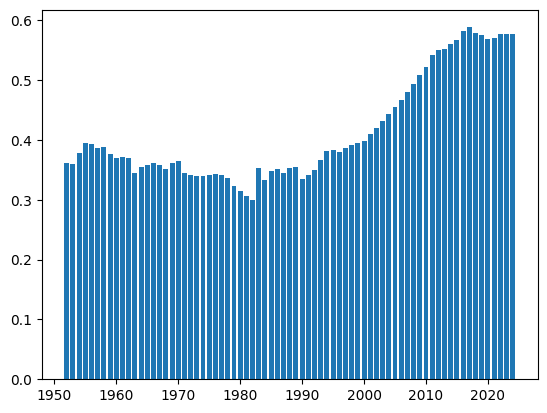

In [103]:
import matplotlib.pyplot as plt
df_income_summary = df_income_summary[df_income_summary['year']>=1952]
df_income = df_income_summary[(df_income_summary['income_distribution']=='bottom_50%') | (df_income_summary['income_distribution']=='top_10%')]

for country in ['IN']:
    df_plot = df_income[df_income['country']== country]
    plt.bar(df_plot['year'], df_plot['value'])
    plt.show()

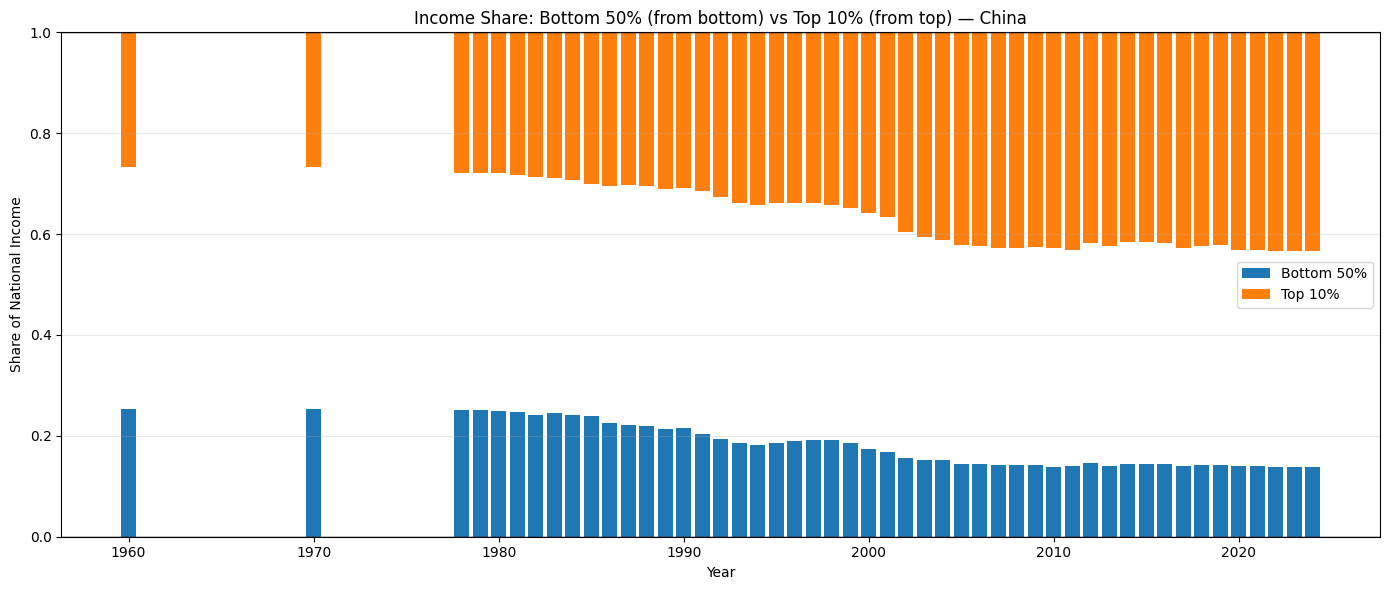

In [107]:
import matplotlib.pyplot as plt

# --- filter + pivot like you already did ---
df_plot = df_income_summary[
    (df_income_summary['country'] == 'CN') &
    (df_income_summary['year'] >= 1952)
]

df_wide = df_plot.pivot(
    index='year',
    columns='income_distribution',
    values='value'
)[['bottom_50%', 'top_10%']]   # ensure order

years    = df_wide.index.values
bottom50 = df_wide['bottom_50%'].values
top10    = df_wide['top_10%'].values

fig, ax = plt.subplots(figsize=(14, 6))

# 1) Bottom 50%: bar from 0 up to bottom50
ax.bar(years,
       bottom50,
       width=0.8,
       color='tab:blue',
       label='Bottom 50%')

# 2) Top 10%: bar from 1 downward to (1 - top10)
#    -> height = top10, bottom = 1 - top10
ax.bar(years,
       top10,
       width=0.8,
       bottom=1 - top10,
       color='tab:orange',
       label='Top 10%')

# axis + cosmetics
ax.set_ylim(0, 1)
ax.axhline(0, color='black', linewidth=1)
ax.axhline(1, color='black', linewidth=1)

ax.set_title("Income Share: Bottom 50% (from bottom) vs Top 10% (from top) — China")
ax.set_xlabel("Year")
ax.set_ylabel("Share of National Income")
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [106]:
df_income_summary

,country,variable,percentile,year,value,age,pop,p_start,p_end,income_distribution
10,IN,sptincj999,p90p100,1952,0.3610,999,j,90.0,100.0,top_10%
11,IN,sptincj999,p90p100,1953,0.3604,999,j,90.0,100.0,top_10%
12,IN,sptincj999,p90p100,1954,0.3788,999,j,90.0,100.0,top_10%
13,IN,sptincj999,p90p100,1955,0.3956,999,j,90.0,100.0,top_10%
14,IN,sptincj999,p90p100,1956,0.3925,999,j,90.0,100.0,top_10%
...,...,...,...,...,...,...,...,...,...,...
1699,ZA,sptincj999,p0p50,2020,0.0627,999,j,0.0,50.0,bottom_50%
1700,ZA,sptincj999,p0p50,2021,0.0627,999,j,0.0,50.0,bottom_50%
1701,ZA,sptincj999,p0p50,2022,0.0627,999,j,0.0,50.0,bottom_50%
1702,ZA,sptincj999,p0p50,2023,0.0627,999,j,0.0,50.0,bottom_50%


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_60778/2424675687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year[['p_start', 'p_end']] = df_year['percentile'].str.extract(r'p(\d+\.?\d*)p(\d+\.?\d*)').astype("float")
/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_60778/2424675687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year[['p_start', 'p_end']] = df_year['percentile'].str.extract(r'p(\d+\.?\d*)p(\d+\.?\d*)').astype("float")


,country,variable,percentile,year,value,age,pop,p_start,p_end
309344,IN,sptincj999,p4p100,2024,0.9954,999,j,4.0,100.0
376576,IN,sptincj999,p0p1,2024,0.0008,999,j,0.0,1.0
376796,IN,sptincj999,p0p10,2024,0.0164,999,j,0.0,10.0
377144,IN,sptincj999,p0p100,2024,1.0000,999,j,0.0,100.0
377282,IN,sptincj999,p0p11,2024,0.0187,999,j,0.0,11.0


In [12]:
df_year[(df_year['p_start']==0) & (df_year['p_end']==50)]


,country,variable,percentile,year,value,age,pop,p_start,p_end
385097,IN,sptincj999,p0p50,2024,0.1502,999,j,0.0,50.0
557497,IN,sptincj992,p0p50,2024,0.1502,992,j,0.0,50.0


In [26]:
df_sorted = df_year.sort_values(by='p_start', ascending=True).reset_index(drop=True)
df_sorted.head(20)

,country,variable,percentile,year,value,age,pop,p_start,p_end
0,IN,sptincj992,p0p1,2024,0.0008,992,j,0.0,1.0
1,IN,sptincj992,p0p93,2024,0.4758,992,j,0.0,93.0
2,IN,sptincj992,p0p92,2024,0.4536,992,j,0.0,92.0
3,IN,sptincj992,p0p91,2024,0.4366,992,j,0.0,91.0
4,IN,sptincj992,p0p90,2024,0.4232,992,j,0.0,90.0
5,IN,sptincj992,p0p9,2024,0.0143,992,j,0.0,9.0
6,IN,sptincj992,p0p89,2024,0.4119,992,j,0.0,89.0
7,IN,sptincj992,p0p88,2024,0.4013,992,j,0.0,88.0
8,IN,sptincj992,p0p87,2024,0.3910,992,j,0.0,87.0
9,IN,sptincj992,p0p86,2024,0.3810,992,j,0.0,86.0


In [27]:
print(df_sorted['p_start'].min(), df_sorted['p_end'].max())

0.0 100.0


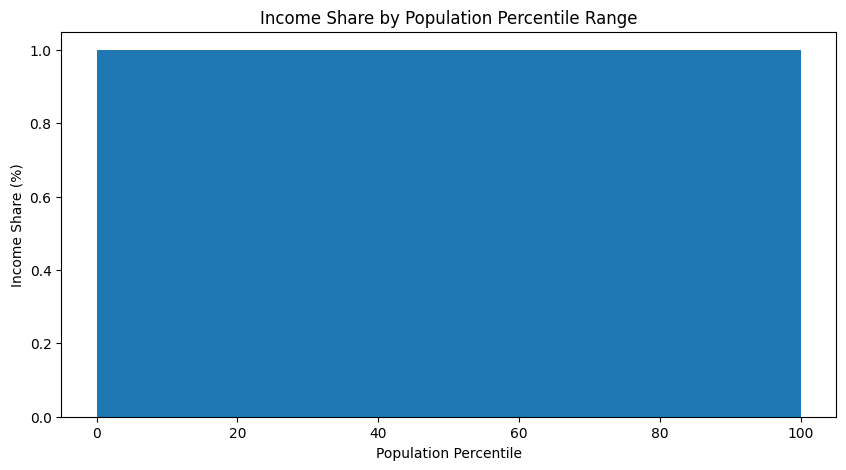

In [29]:
plt.figure(figsize=(10, 5))
plt.bar(
    df_sorted['p_start'],
    df_sorted['value'],
    width=df_sorted['p_end'] - df_sorted['p_start'],
    align='edge'
)


plt.xlabel("Population Percentile")
plt.ylabel("Income Share (%)")
plt.title("Income Share by Population Percentile Range")
plt.show()


In [31]:
import pandas as pd

def build_non_overlapping_bins(df):
    # Ensure sorted and clean
    df = df.copy()
    df = df.sort_values(['p_start', 'p_end']).reset_index(drop=True)

    # 1) all unique boundaries
    boundaries = sorted(set(df['p_start']).union(df['p_end']))

    bins = []

    # 2) loop over consecutive boundaries
    for a, b in zip(boundaries[:-1], boundaries[1:]):
        if b <= a:
            continue

        # all original intervals that fully cover [a, b]
        candidates = df[(df['p_start'] <= a) & (df['p_end'] >= b)]
        if candidates.empty:
            # no interval covers this piece – skip or raise
            continue

        # 3) choose the narrowest (most granular) covering interval
        candidates = candidates.assign(width=candidates['p_end'] - candidates['p_start'])
        chosen = candidates.loc[candidates['width'].idxmin()]

        bins.append({
            'p_start': a,
            'p_end': b,
            'value': chosen['value']
        })

    return pd.DataFrame(bins)

# Example:
df_bins = build_non_overlapping_bins(df_year)
df_bins.head()


,p_start,p_end,value
0,0.0,1.0,0.0008
1,1.0,2.0,0.0011
2,2.0,3.0,0.0013
3,3.0,4.0,0.0015
4,4.0,5.0,0.0017


In [32]:
df_bins.head(100)

,p_start,p_end,value
0,0.0,1.0,0.0008
1,1.0,2.0,0.0011
2,2.0,3.0,0.0013
3,3.0,4.0,0.0015
4,4.0,5.0,0.0017
...,...,...,...
95,95.0,96.0,0.0487
96,96.0,97.0,0.0518
97,97.0,98.0,0.0569
98,98.0,99.0,0.0696


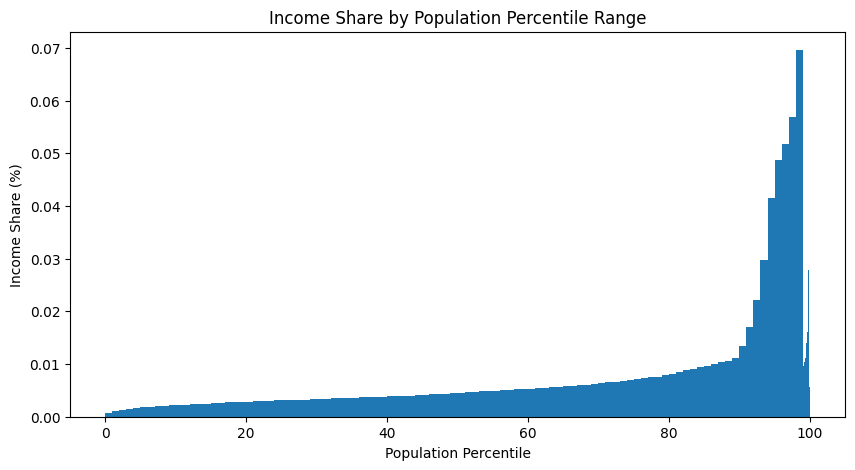

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(
    df_bins['p_start'],
    df_bins['value'],
    width=df_bins['p_end'] - df_bins['p_start'],
    align='edge'
)

plt.xlabel("Population Percentile")
plt.ylabel("Income Share (%)")
plt.title("Income Share by Population Percentile Range")
plt.show()


In [36]:
def rebin_to_fixed_tens(df):
    df = df.copy()
    df["width"] = df["p_end"] - df["p_start"]
    df["density"] = df["value"] / df["width"]

    fixed_bins = [(i, i+10) for i in range(0, 100, 10)]
    results = []

    for a, b in fixed_bins:
        bin_share = 0.0

        for _, row in df.iterrows():
            p_start = row["p_start"]
            p_end = row["p_end"]
            density = row["density"]

            # overlap between [a,b] and [p_start,p_end]
            overlap = max(0, min(b, p_end) - max(a, p_start))
            if overlap > 0:
                bin_share += density * overlap

        results.append({"bin_start": a, "bin_end": b, "income_share": bin_share})

    return pd.DataFrame(results)

# Run it
df_10bins = rebin_to_fixed_tens(df_year)
df_10bins


,bin_start,bin_end,income_share
0,0,10,12.234848
1,10,20,14.172726
2,20,30,16.177948
3,30,40,18.370381
4,40,50,20.830372
5,50,60,23.808097
6,60,70,27.212206
7,70,80,31.550478
8,80,90,37.765506
9,90,100,55.192838


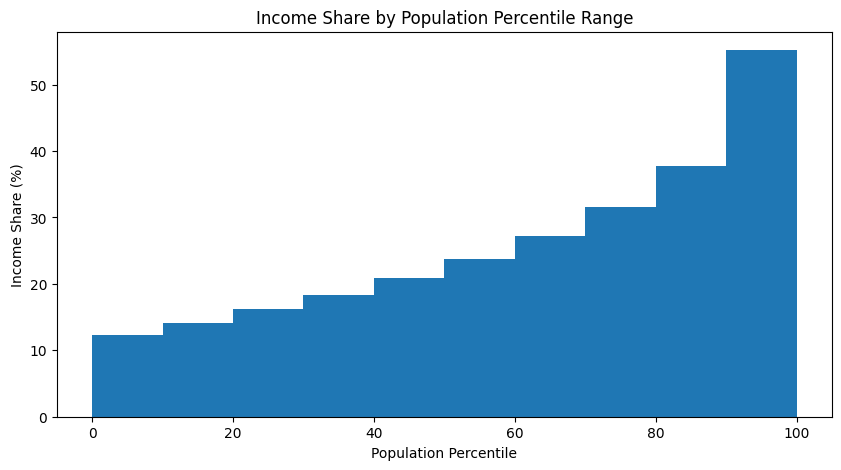

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(
    df_10bins['bin_start'],
    df_10bins['income_share'],
    width=df_10bins['bin_end'] - df_10bins['bin_start'],
    align='edge'
)

plt.xlabel("Population Percentile")
plt.ylabel("Income Share (%)")
plt.title("Income Share by Population Percentile Range")
plt.show()

In [70]:
df = pd.read_csv('main unemp table.csv')

In [71]:
# Force string type first
df['GEOID'] = df['GEOID'].astype(str)

# Take last 11 characters (Census tract length)
df['GEOID'] = df['GEOID'].str[-11:]

df['GEOID'].head(10)

0    36005000100
1    36005000200
2    36005000400
3    36005001600
4    36005001901
5    36005001902
6    36005001903
7    36005001904
8    36005002001
9    36005002002
Name: GEOID, dtype: object

In [72]:
#change dtype to string
df['GEOID'].dtype

dtype('O')

In [73]:
df['GEOID'].dtype

dtype('O')

In [74]:
df.to_csv('table_3.csv', index=False)